# Exercise 2 - Polynomial Regression

In this exercise you will learn about a new type of regression - the polynomial regression. With polynomial regression it is possible to fit a nonlinear relationship between the dependent and the independent variables, although the problem of estimating the parameters is linear and can be solved with the standard linear regression approach.

The idea here is to learn a bunch of (polynomial) models on the same data set and explore the meaning of over- and underfitting the data.

In a second part, we will use Leave One Out Crossvalidation to find a good regularization parameter on the Boston Housing dataset.

In the event of a persistent problem, do not hesitate to contact the course instructor under

- paul.kahlmeyer@uni-jena.de
- maurice.wenig@uni-jena.de

### Submission
- Deadline of submission:
23.04.2024 23:59
- Submission on [moodle page](https://moodle.uni-jena.de/course/view.php?id=54249)


### Help
In case you cannot solve a task, you can use the saved values within the `help` directory:
- Load arrays with [Numpy](https://numpy.org/doc/stable/reference/generated/numpy.load.html)
```
np.load('help/array_name.npy')
```
- Load functions with [Dill](https://dill.readthedocs.io/en/latest/dill.html)
```
import dill
with open('help/some_func.pkl', 'rb') as f:
    func = dill.load(f)
```

to continue working on the other tasks.

## Dataset
We now have a new dataset saved as `train.npy`.

### Task 1
Load this Dataset using the [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html) function.

In [12]:
import numpy as np

data = np.load("train.npy")

X = data[:, 0]
Y = data[:, 1]

[1.77152585 1.8323356  2.08348038 2.64248478 2.42008895 2.61199117
 3.23176891 3.26454501 3.44611195 3.38638483 2.87448268 2.95697418
 3.23930128 3.39232386 4.13988579 3.85606092 4.8118854  5.03205152
 4.98563937 5.676886   7.36569134 7.33552114 8.82765252 8.64258883
 9.19416215 9.21915646 9.16342997 9.62771185 9.45159987 9.10258287]


Columns of the dataset represent the variables. Let `X` be the explanatory variable in the first column and `Y` be the variable we want to predict in the second column. 

### Task 2
Visualize the data with a scatterplot of `X` against `Y`.

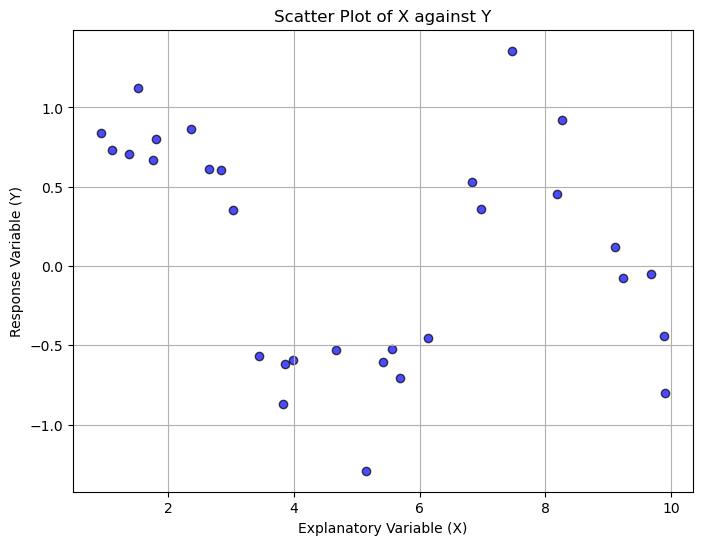

In [16]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', edgecolor='k', alpha=0.7)
plt.title("Scatter Plot of X against Y")
plt.xlabel("Explanatory Variable (X)")
plt.ylabel("Response Variable (Y)")
plt.grid(True)
plt.show()

## Polynomial Regression
As you can see, the relationship between the dependent variable and the explanatory one does not seem to be linear and the standard linear regression from the lecture will not perform well. One way to account for such a non linear relationship is called [polynomial regression](https://en.wikipedia.org/wiki/Polynomial_regression). For a scalar explanatory variable `X` and a scalar dependent variable `Y`, the data generation model is:

$$
Y = \theta_0 + \theta_1 * X + \theta_2 X^2 + \dots + \theta_d X^d  + \epsilon = \sum_{j=0}^d \theta_j X^j + \epsilon
$$
where $d$ is called degree. Similar to linear regression, we assume $\varepsilon$ to be standard normal distributed noise.

Although the relationship between the dependent and the explanatory variable is non linear, the problem of estimating the parameters $\theta$ is linear. By vectorizing the model, this becomes obvious:

$$
\begin{bmatrix}
    Y_1 \\
    Y_2 \\
    \vdots \\
    Y_n
\end{bmatrix}
=
\begin{bmatrix}
    \theta_0 \\
    \theta_1 \\
    \vdots \\
    \theta_d
\end{bmatrix}^T
\begin{bmatrix}
    1 & 1 & \dots & 1\\
    X_1 & X_2 & \dots & X_n\\
    \vdots&\vdots&\vdots&\vdots\\
    X_1^d & X_2^d &\dots & X_n^d
\end{bmatrix}
+
\begin{bmatrix}
    \epsilon_1 \\
    \epsilon_2 \\
    \vdots \\
    \epsilon_n
\end{bmatrix}
$$

This linear model can now be fit with the linear regression approach. 

### Task 3
Implement a function `poly` to create the design matrix for the polynomial regression. 

In [49]:
import numpy.typing as npt


def polynomial_design_matrix(x: npt.NDArray[np.float64], degree: int) -> npt.NDArray[np.float64]:
    """Creates the polynomial design matrix.

    Parameters
    ----------
    x : npt.NDArray[np.float64]
        Vector of scalar features.
    degree : int
        Maximum degree of the polynomial.

    Returns
    -------
    npt.NDArray[np.float64]
        Design matrix for polynomial regression. The rows of the design matrix are powers of the input vector x.
    """

    # TODO: return polynomial design matrix
    design_matrix = np.zeros((degree + 1, len(x)))

    # Fill the design matrix
    for i in range(degree + 1):
        design_matrix[i, :] = x**i

    return design_matrix
 
# assertion
x_test = np.array([1, 2, 3, 5])
target = np.array([[1, 1, 1, 1],
                   [1, 2, 3, 5],
                   [1, 4, 9, 25],
                   [1, 8, 27, 125]])

assert np.allclose(polynomial_design_matrix(x_test, 3), target)

[[  1   1   1   1]
 [  1   2   3   5]
 [  1   4   9  25]
 [  1   8  27 125]]


### Task 4
Implement a class `PolyReg` that fits a polynomial model with ordinary least squares. Regularize your maximum-likelihood problem with ridge regression.

Hint: Recycle the `LinReg` class from the last exercise.

In [45]:
from typing import Self


class PolynomialRegressor():
    def __init__(self, degree: int, regularization_constant: int = 0):
        """Polynomial Regressor for 1D features.

        Parameters
        ----------
        degree : int
            Highest degree the fit polynomial should have.
        regularization_constant : int, optional
            Regularization constant for the linear regression, by default 0.
        """

        self.degree = degree
        self.regularization_constant = regularization_constant
        self.theta = None

    def fit(self, x: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> Self:
        """Learn the parameters for a polynomial regression task.

        Parameters
        ----------
        x : npt.NDArray[np.float64]
            Vector of scalar features.
        y : npt.NDArray[np.float64]
            Corresponding vector of scalar labels.
        """

        # TODO: implement
        return self
    def fit_max_liklihood(self, x: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> Self:
        """Learns the parameters for a linear regression task.

        Parameters
        ----------
        x : npt.NDArray[np.float64]
            n_dim x n_data design matrix.
        y : npt.NDArray[np.float64]
            vector of length n_data.
        """

        # TODO: estimate theta
        self.theta = np.linalg.inv(x.T @ x) @ x.T @ y
        return self

    def fit_ridge_regression(self, x: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> Self:
        """Learns the parameters for a linear regression task.

        Parameters
        ----------
        x : npt.NDArray[np.float64]
            n_dim x n_data design matrix.
        y : npt.NDArray[np.float64]
            vector of length n_data.
        """

        # TODO: estimate theta
        n_data, n_features = x.shape
        I = np.eye(n_data)
        lambda_I = self.regularization_constant * I
        self.theta = np.linalg.inv(x @ x.T + lambda_I) @ x @ y
        return self
    def predict(self, x: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
        """Using learned parameters, predicts output for given X.

        Parameters
        ----------
        x : npt.NDArray[np.float64]
            Vector of scalar features.

        Returns
        -------
        npt.NDArray[np.float64]
            Predicted vector of scalar labels.
        """

        # TODO: implement
        pass


# assertion
np.random.seed(0)
x_assert = np.random.rand(1000)
y_assert = np.random.rand(1000)
regressor = PolynomialRegressor(degree=3)
regressor.fit_max_liklihood(x_assert, y_assert)
target = np.array([0.52589354, -0.199265, 0.50928455, -0.33705693])
assert np.allclose(regressor.theta, target)

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

## Visualization
Next we want to fit a series of models of multiple degrees and visualise them alongside the data.

We want to use the following polynomial degrees:

In [ ]:
# model degrees
model_degrees = [0, 1, 2, 3, 6, 9, 12, 15, 18, 21]

### Task 5

For each polynomial degree:
1. Learn the polynomial model
2. Plot the data 
3. Plot the regression line

Plot each model in a separate [subplot](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.subplots.html). Use a scatter plot for the data.

Additionaly experiment what happens if you change the values for the regularization parameter.

In [ ]:
# TODO: Learn models and visualize regression lines

In [ ]:
# TODO: What effect does regularization_constant have on the regression lines?

## Model Validation
To evaluate the models, we need a measure of fit, that tells us how well the model fits the data. The standard measure for continuously distributed data is the ["root mean squared error" (RMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation). Given the dependent variable $Y \in \mathbb{R}^n$ and its prediction $\hat{Y} = f(X, \theta) \in \mathbb{R}^n$, the RMSE is defined as:

$$
\text{RMSE}(Y, \hat{Y}) = \sqrt{\frac{1}{n} \sum_{i}^n (Y_i - \hat{Y}_i)^2}
$$

### Task 6
Implement a `rmse` function that returns the RMSE of a vector of observations $Y$ and its predictions $\hat{Y}$

In [ ]:
def rmse(y: npt.NDArray[np.float64], y_hat: npt.NDArray[np.float64]) -> float:
    """Calculates the root mean squared error (RMSE) of Y and its prediction Y_hat.

    Parameters
    ----------
    y : npt.NDArray[np.float64]
        Vector of true dependend variables.
    y_hat : npt.NDArray[np.float64]
        Vector of predicted dependend variables.

    Returns
    -------
    float
        Root mean squared error between y and y_hat.
    """

    # TODO: calculate RMSE
    pass


# assertion
np.random.seed(0)
y = np.random.rand(100)
y_hat = np.random.rand(100)
assert np.isclose(rmse(y, y_hat), 0.41628103800387234)

Now we want to estimate which polynomial estimation fits best to our data.
More complex models will in general yield better results on the data that was used to train them, but the quality of the model is determined by its "generalizability" ("how well does the model perform on data that it has not seen before?"). 

To evaluate this performance, we split the data in two sets:
- trainset (`train.npy`)
- testset (`test.npy`)

where we train our predictor on the trainset and evaluate the generalizability on the testset.

### Task 7

Load the testset (stored as `test.npy`).

In [ ]:
# TODO: load test data

### Task 8
To estimate the quality of our models:
- fit 20 polynomial models of degree 0 to 19 on the trainset.
- calculate the RMSE of all the models on the trainset.
- calculate the RMSE of all the models on the testset.

Set the regularization parameter to 5.

In [ ]:
# TODO: calculate train- and test RMSEs

### Task 9
Now visualize the training RMSE and testing RMSE in dependence of the degree of the models.

In [ ]:
# TODO: plot RMSEs against polynomial degree

From the two curves of the previously generated figure you can determine the fit of the models.


||Train RMSE|Test RMSE|
| --- | --- | --- |
|Underfitting|High|High|
|Overfitting|Low|High|
|Good|Low|Low|
|Bad split|High|Low|

### Task 10
List briefly:
- which models underfit
- which models overfit 

In [ ]:
# TODO: answer